#### 40/40.Good job Thomas. 

In [150]:
#python version 3.11.4  conda version 23.7.3
import pandas as pd # v 1.5.3
import numpy as np # v 1.26.1
import sklearn # v 0.0.3
import pmdarima as pm # v 2.0.3
import statsmodels.api as sm # v 0.14.0
import matplotlib.pyplot as plt # 3.7.1
import sweetviz as sv # 2.2.1
import pytest_warnings as ww #v 0.3.1
import warnings as w
import statsmodels.tsa.stattools as stattools  # v 0.14.0
import matplotlib.pyplot as plt # 3.7.1


from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller # v 0.14.0
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.14.0
from statsmodels.tsa.arima_model import ARIMA # v 0.14.0

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from mlxtend.feature_selection import SequentialFeatureSelector #0.23.0

from sklearn.model_selection import KFold

In [151]:
smd = pd.read_csv(r"/Users/thomassniezek/Downloads/sales_market_data.csv")#r tells it to run row file path  # Raw file path

In [152]:
smd.describe()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,171327.118952,30.593034,0.251139,98.678740,0.494526,14.599829,1479.569556,1596.504284
std,81397.843301,17.493103,0.145348,57.117347,0.286810,8.715533,885.419636,927.474787
min,1992.000000,0.190000,0.000000,0.130000,0.000000,0.140000,4.000000,12.540000
25%,112479.250000,14.830000,0.130000,49.637500,0.250000,6.917500,708.250000,786.327500
50%,170390.500000,31.385000,0.250000,97.510000,0.490000,14.820000,1413.500000,1595.455000
75%,226027.250000,45.660000,0.380000,147.620000,0.740000,22.100000,2273.000000,2420.687500
max,393914.000000,59.960000,0.500000,199.910000,1.000000,29.990000,2997.000000,3198.270000


In [153]:
smd.head()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91


In [154]:
smd.tail()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
987,26191,19.69,0.18,32.60,0.81,26.22,1840,2238.49
988,132714,19.48,0.23,116.64,0.21,17.53,2156,1564.64
989,32894,22.79,0.49,39.33,0.26,29.23,503,1020.22
990,39091,13.84,0.14,37.71,0.33,23.13,2902,1201.03
991,37290,7.81,0.19,78.55,0.62,23.40,1820,653.62


In [155]:
smd.shape, smd.columns, smd.dtypes # this code tells how many columns there are, the names of the columns and the type each column is. It also says how many rows,in this case, there are 992. 8 columns 

((992, 8),
 Index(['Sale', 'InStrSpending', 'Discount', 'TVSpending', 'StockRate', 'Price',
        'Radio', 'OnlineAdsSpending'],
       dtype='object'),
 Sale                   int64
 InStrSpending        float64
 Discount             float64
 TVSpending           float64
 StockRate            float64
 Price                float64
 Radio                  int64
 OnlineAdsSpending    float64
 dtype: object)

In [156]:
my_report = sv.analyze(smd)

                                             |          | [  0%]   00:00 -> (? left)

In [157]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [158]:
#looking at the data, there are not any missing data points. There are a few zeros, specifically under discount which makes sense beacuse 0 would mean that there was not actually a discount. 
#Sale is fairly normal as the average is 171K while the median is 170K. It also looks like it is fairly centered. 
#On average it looks like the median and the average are close in each one. 

In [159]:
y = smd['Sale'] #sets the y as sale

In [160]:
X= smd.loc[:, smd.columns != 'Sale'] #makes all fo the xs and excludes the column Sale

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [162]:
tree_regressor = DecisionTreeRegressor() #this creates the classes 
lasso_regressor = Lasso()
ridge_regressor = Ridge()

In [163]:
tree_regressor.fit(X_train, y_train)
#this fits the model

DecisionTreeRegressor()

In [164]:
tree_pred = tree_regressor.predict(X_test) #creates the prediction

In [165]:
mse_tree = mean_squared_error(y_test, tree_pred) #Makes the Mean Squared Error

In [166]:
print("Mean Squared Error (MSE) for Decision Tree:", mse_tree)

Mean Squared Error (MSE) for Decision Tree: 519535759.1107383


In [167]:

k_best = 5  # Specifies the number of best features to select
selector = SelectKBest(score_func=f_regression, k=k_best) #creates the SelectKBest
X_train_selected = selector.fit_transform(X_train, y_train) #Fits the SelectKBest the data
X_test_selected = selector.transform(X_test)

In [168]:
model = LinearRegression()

In [169]:
model.fit(X_train_selected, y_train) #train a regression using the variabels selected

LinearRegression()

In [170]:
y_pred = model.predict(X_test_selected) #makes a prediction
mse_best_subset = mean_squared_error(y_test, y_pred) #This will evaluate the model

In [171]:
selected_features_indices = selector.get_support(indices=True) #Gets the indicies of the selected features
selected_features = X.columns[selected_features_indices]
print("Selected Features:", selected_features) #Tells us the features that were selected
print("Mean Squared Error (MSE) for Best Subset Regression:", mse_best_subset) #tells us the Mean Squared error when using this. 

Selected Features: Index(['InStrSpending', 'TVSpending', 'StockRate', 'Price',
       'OnlineAdsSpending'],
      dtype='object')
Mean Squared Error (MSE) for Best Subset Regression: 11096898.161206236


In [172]:
ridge_regressor.fit(X_train, y_train)

Ridge()

In [173]:
ridge_pred = ridge_regressor.predict(X_test)

In [174]:
mse_ridge = mean_squared_error(y_test, ridge_pred)

In [175]:
print("Mean Squared Error (MSE) for Ridge:", mse_ridge)

Mean Squared Error (MSE) for Ridge: 10769063.91423867


In [176]:
#For these three models, the error metreic I decided to use was Mean Square Error. After fitting and running each model, the one with the lowest mean squared error was ridge.
#Based on Ridge having the lowest mean squared error, I would prefer to use that method. It is the lowest by around 3% of the next closest mean squared error. 


In [177]:
tree_regressor = DecisionTreeRegressor(criterion="absolute_error", splitter="random")


In [178]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', splitter='random')

In [179]:
tree_pred = tree_regressor.predict(X_test)


In [180]:
mse_tree = mean_squared_error(y_test, tree_pred)

In [181]:
print("Mean Squared Error (MSE) for Decision Tree:", mse_tree)

Mean Squared Error (MSE) for Decision Tree: 663284193.7684563


In [182]:
#After creating and running the new decision tree model, the Mean squared error for the new model was worse than the three from before. 
#this would make me stay with my main method of Ridge. 

In [183]:
#Based on the decision rule(decision trees), shrinkage method(ridge and Lasso), and the vaiable selection(Best subset regression) methods that were used above,
# Ridge Had the best Mean Squared Error so it appears that it was the best method to predict the dependent variable. 
# The variables that were the most predictive appeaer to be InStrSpending', 'TVSpending', 'StockRate', 'Price' and 'OnlineAdsSpending'

In [184]:
nba = pd.read_csv(r"/Users/thomassniezek/Downloads/nba.csv")#r tells it to run row file path

In [185]:
smd.shape, smd.columns, smd.dtypes

((992, 8),
 Index(['Sale', 'InStrSpending', 'Discount', 'TVSpending', 'StockRate', 'Price',
        'Radio', 'OnlineAdsSpending'],
       dtype='object'),
 Sale                   int64
 InStrSpending        float64
 Discount             float64
 TVSpending           float64
 StockRate            float64
 Price                float64
 Radio                  int64
 OnlineAdsSpending    float64
 dtype: object)

In [186]:
my_report2 = sv.analyze(nba)

                                             |          | [  0%]   00:00 -> (? left)

In [187]:
my_report2.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [188]:
#After looking at the graphs and analyzing some data, It can be seen that there are a few points in 3P% that are missing (11 points). 
#The classification for the 5 year target was approximately balanced. It was 62% 1 (career length >=5 years) and 38% 0 (career length <5 years).
#there is no additional balancing needed. The accuracy error metric may not be the most reliable though. 

In [189]:
nba = nba.dropna(subset=['3P%']) #This drops those 13 rows that are missing the 3P%

In [190]:
X1 = nba.drop(['TARGET_5Yrs', 'Name'], axis=1) #makes all fo the xs and excludes the column target_5yrs as well as name because it is a string

In [191]:
y1 = nba['TARGET_5Yrs']  #makes the y target_5yrs

In [192]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=6) #split the data

In [193]:
dt_classifier = DecisionTreeClassifier() #create the decision tree

In [194]:
dt_classifier.fit(X1_train, y1_train) #fit the decision tree with default parameters

DecisionTreeClassifier()

In [195]:
y1_pred = dt_classifier.predict(X1_test) #evaluate the model

In [196]:
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred)
recall = recall_score(y1_test, y1_pred)
f1 = f1_score(y1_test, y1_pred)
conf_matrix = confusion_matrix(y1_test, y1_pred)

In [197]:
print("Accuracy:", accuracy) #Proportion of correctly classified instances.
print("Precision:", precision) #Proportion of true positive predictions among all positive predictions.
print("Recall:", recall) #Proportion of true positive predictions among all actual positives
print("F1 Score:", f1) #Harmonic mean of precision and recall,used because there is a slight imbalance between classes but not too bad.
print("Confusion Matrix:\n", conf_matrix) #shows the true positive, true negative, false positive, and false negative predictions.

Accuracy: 0.5588972431077694
Precision: 0.6431372549019608
Recall: 0.6586345381526104
F1 Score: 0.6507936507936508
Confusion Matrix:
 [[ 59  91]
 [ 85 164]]


In [198]:
#Based on these metrics, the tree was not great. It was correct just about 60% of the time. It was similar to almost guessing. 
#The precision and recall scores were better at almost 70%. This could have a threshhold for accuracy closer to 70% because although it doesn't have an impact directly on the player,
#it could affect how a team may decide how to sign this player. 

In [199]:
dt_classifier_non_default = DecisionTreeClassifier(max_depth=6, min_samples_split=2, random_state=6) #max depth will help prevent over fitting and min samples prevent small splits that capture noise in the data.
dt_classifier_non_default.fit(X1_train, y1_train)# fits the model

DecisionTreeClassifier(max_depth=6, random_state=6)

In [200]:
y_pred_non_default = dt_classifier_non_default.predict(X1_test)
#Makes the predictions

In [201]:
accuracy_non_default = accuracy_score(y1_test, y_pred_non_default)
precision_non_default = precision_score(y1_test, y_pred_non_default)
recall_non_default = recall_score(y1_test, y_pred_non_default)
f1_non_default = f1_score(y1_test, y_pred_non_default)
conf_matrix_non_default = confusion_matrix(y1_test, y_pred_non_default)

In [202]:
print("\nMetrics for the Decision Tree with non-default parameters:") #These are the metrics
print("Accuracy:", accuracy_non_default)
print("Precision:", precision_non_default)
print("Recall:", recall_non_default)
print("F1 Score:", f1_non_default)
print("Confusion Matrix:\n", conf_matrix_non_default)


Metrics for the Decision Tree with non-default parameters:
Accuracy: 0.6340852130325815
Precision: 0.6958174904942965
Recall: 0.7349397590361446
F1 Score: 0.7148437500000001
Confusion Matrix:
 [[ 70  80]
 [ 66 183]]


In [203]:
#Based on these metrics compared to the first decision free metrics, I would go with the decision tree without the default parameters. 
#Every single metric is better on the one with non-default parameters which is why I would choose it. 


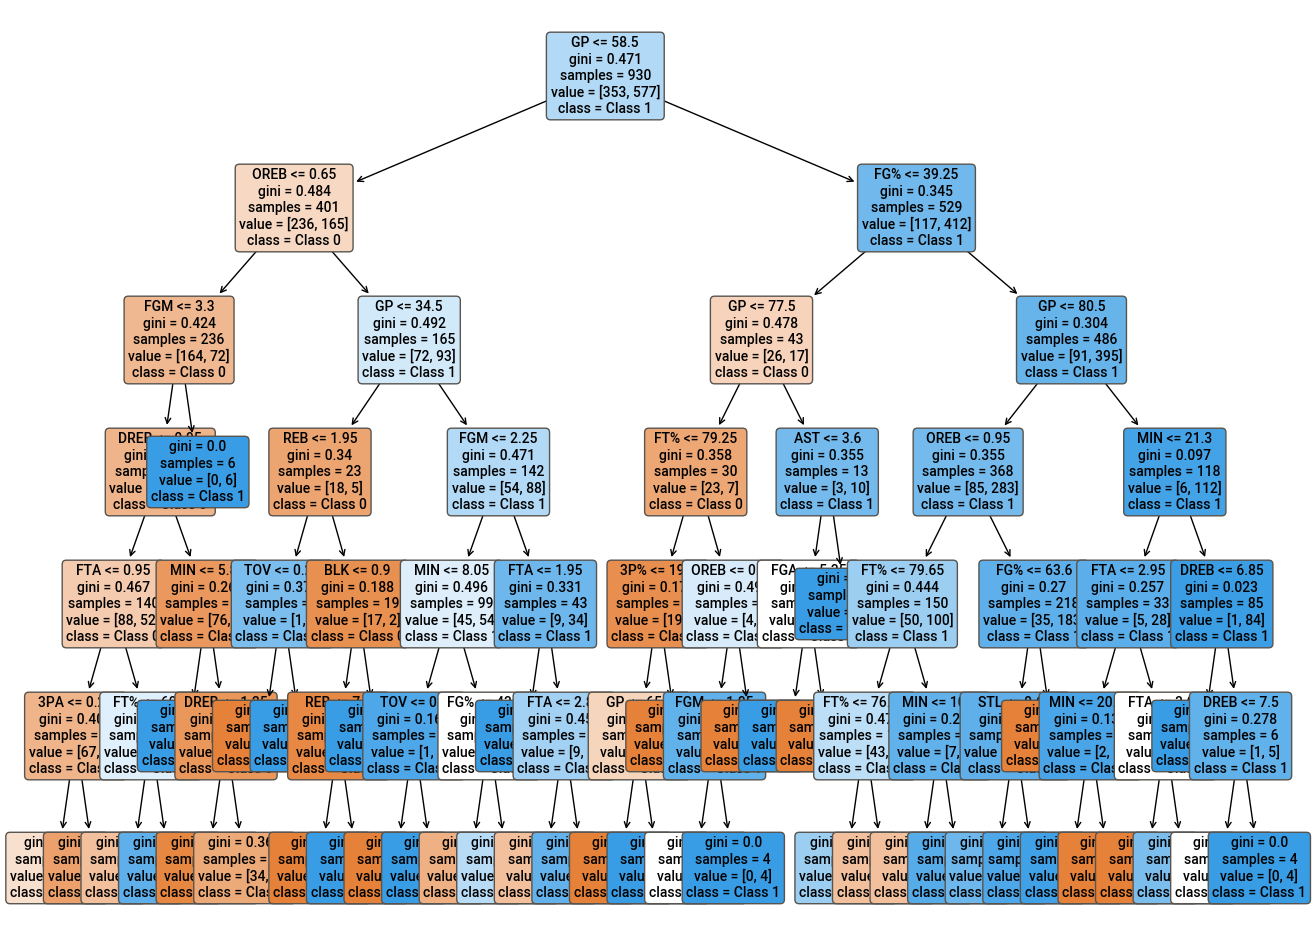

In [204]:
plt.figure(figsize=(16, 12))
plot_tree(dt_classifier_non_default, feature_names=X1.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True, fontsize=10)
plt.show()

#### Good job on the plot above. This looks good. 

In [205]:
#the first decision made is Games played over under 58.5. This makes sense as a higher amount of games played usually means that player is better and more likely to play in the league longer  
# It then looks at field goal % and Offensive rebounds. This makes sense as higher for both of these would amke a player more valuable to a team so they would be more likely to last in the league  
#IT then looks at metrics like FieldGoalsMade, Defensive rebounds, rebounds, assists and miniutes. These all make sense for this classification problem since they are valuable to managers which ultimately decides if a player is ging to stay in the league for at least 5 years. 
#Overall, these decision rules do make sense for a classification problem. Lower stats means more lilely to not be in the league for very long. 